In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [3]:
df=pd.read_csv('../../Data/train_processed.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,AgeGroup,FareGroup,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,0,YoungAdult,Low,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,1,Adult,VeryHigh,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,YoungAdult,Mid,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,1,YoungAdult,VeryHigh,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,0,YoungAdult,Mid,1,1


In [4]:
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
df = pd.get_dummies(df,columns=["AgeGroup", "FareGroup"],drop_first=True)

In [5]:
y = df['Survived']  # target variable
X = df.drop('Survived' , axis=1)  #featured

In [6]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=47)

In [7]:
LR =LogisticRegression(max_iter=1000,random_state=0)
LR.fit(train_X,train_y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [8]:
predictions=LR.predict(test_X)
accuracy=accuracy_score(test_y,predictions)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8156


In [9]:
# Save the model as a pickle in a file
joblib.dump(LR, 'LR_Model.joblib')

['LR_Model.joblib']

## Confusion Matrix

In [10]:
cm = confusion_matrix(test_y, predictions)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[96 13]
 [20 50]]


Validating confusion matrix-   
Total samples: 96 + 13 + 20 + 50 = 179  
Correct predictions: 96 + 50 = 146  
Accuracy: 146 / 179 ≈ 0.8156    
Matches the accuracy exactly.   

96 Non-survivors correctly predicted    
50 Survivors correctly predicted    
13 Predicted survived but didn’t    
20 Missed survivors (false negatives)   


## Model Evaluation: Precision, Recall, and F1-score

Accuracy alone does not fully describe model performance, especially when class distributions are imbalanced.
Therefore, additional evaluation metrics are used:

- **Precision** measures how many predicted survivors were actually survivors.
- **Recall** measures how many actual survivors were correctly identified by the model.
- **F1-score** provides a balanced measure between precision and recall.

These metrics are computed using the test dataset predictions.


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

precision = precision_score(test_y, predictions)
recall = recall_score(test_y, predictions)
f1 = f1_score(test_y, predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(test_y, predictions))


Precision: 0.7937
Recall: 0.7143
F1-score: 0.7519

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       109
           1       0.79      0.71      0.75        70

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



## Normalized Confusion Matrix

The normalized confusion matrix shows the proportion of correct and incorrect predictions
for each class. Normalization helps interpret model performance independent of class size.

- Rows represent actual class labels
- Columns represent predicted class labels
- Values indicate the fraction of samples in each category

This visualization helps identify where the model performs well and where misclassifications occur.

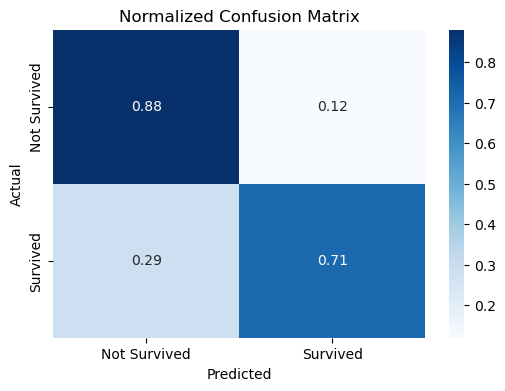

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()
